In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone

'yolov5'에 복제합니다...
remote: Enumerating objects: 14992, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14992 (delta 0), reused 1 (delta 0), pack-reused 14989
오브젝트를 받는 중: 100% (14992/14992), 13.96 MiB | 8.81 MiB/s, 완료.
델타를 알아내는 중: 100% (10299/10299), 완료.


In [2]:
cd yolov5

/Users/minyoungxi/DataScience/ai/CNN/yolov5


In [2]:
pip install -r requirements.txt 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [5]:
model = torch.hub.load("ultralytics/yolov5", 'yolov5s') # torch hub 에서 사전 훈련된 울트라틱스 모델을 로드하는 것입니다. 

# yolov5s 는 특정한 버전을 정의할 수 있습니다. 작은 모델을 사용하므로 s 를 붙이고 버전은 토치 허브에서 확인할 수 있습니다.

Using cache found in /Users/minyoungxi/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-1-17 Python-3.9.13 torch-1.13.1 CPU

Fusing layers... 
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [7]:
img = "https://media.istockphoto.com/id/155287967/photo/cars-in-rush-hour-with-traffic-at-dawn.jpg?s=612x612&w=0&k=20&c=tDAaJQMHIh6nFDr0rJlD44tEtmj2srdpoSTKL7C5SGE="

In [8]:
results = model(img)
results.print()

image 1/1: 408x612 22 cars
Speed: 135.1ms pre-process, 726.4ms inference, 26.1ms NMS per image at shape (1, 3, 448, 640)


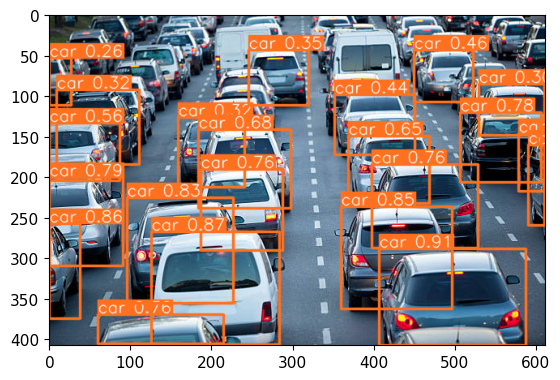

In [9]:
%matplotlib inline 

plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.xyxy      # The output from running results.xyxy is as follows : xmin , ymin, xmax, ymax, confidence, class 

                  # 다양한 다른 좌표들을 얻을 수 있음.

[tensor([[4.07406e+02, 2.89385e+02, 5.88957e+02, 4.08000e+02, 9.12926e-01, 2.00000e+00],
         [1.26915e+02, 2.68741e+02, 2.84538e+02, 4.07689e+02, 8.72492e-01, 2.00000e+00],
         [2.10382e-01, 2.58503e+02, 3.83146e+01, 3.75164e+02, 8.60075e-01, 2.00000e+00],
         [3.60700e+02, 2.37509e+02, 4.97348e+02, 3.63832e+02, 8.51849e-01, 2.00000e+00],
         [9.62071e+01, 2.26528e+02, 2.27033e+02, 3.56245e+02, 8.33532e-01, 2.00000e+00],
         [0.00000e+00, 2.01178e+02, 9.16151e+01, 3.10973e+02, 7.88094e-01, 2.00000e+00],
         [5.07429e+02, 1.21653e+02, 6.07474e+02, 2.07202e+02, 7.81547e-01, 2.00000e+00],
         [1.87249e+02, 1.91625e+02, 2.88864e+02, 2.91492e+02, 7.59939e-01, 2.00000e+00],
         [6.08434e+01, 3.70410e+02, 2.15842e+02, 4.06195e+02, 7.58251e-01, 2.00000e+00],
         [3.98687e+02, 1.85690e+02, 5.29600e+02, 2.88583e+02, 7.56478e-01, 2.00000e+00],
         [1.84826e+02, 1.42562e+02, 2.98979e+02, 2.39144e+02, 6.80135e-01, 2.00000e+00],
         [3.69365e+02

In [11]:
np.array(results.render()).shape

(1, 408, 612, 3)

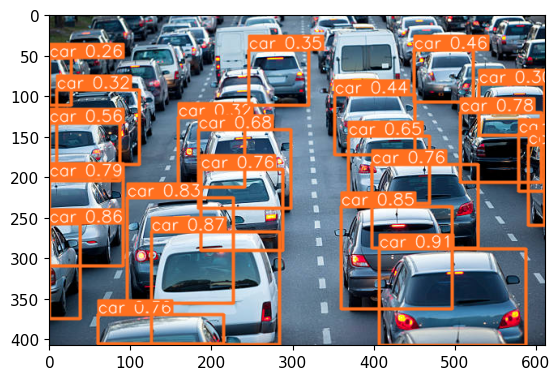

In [12]:
plt.imshow(np.squeeze(results.render()))

# Real Time Detections

In [17]:
# 단지 실시간으로 피드에 액세스하는 코드

cap = cv2.VideoCapture(0) # 웹캠에 액세스 하는 방법 , 자신의 기기에서 비디오 캡쳐 장치가 몇 번인지 확인.  

if not cap.isOpened():
  print("fail")

while cap.isOpened(): # 캠이 열려있는 동안 수행 
    ret, frame = cap.read() # 웹캠의 프레임이나 웹캠에서 이미지를 더한 부분 반환 
    
    # Make Detection
    results = model(frame) # 웹캠에서 얻은 프레임을 통과시킬 것이므로 cap.read를 실행할 때를 기억해야 한다. 
    
    cv2.imshow('YOLO', np.squeeze(results.render())) # 카메라 상단 팝업 바에 나타날 문장
    
    # np.squeeze(results.render()) -> 배열을 렌더링 함수에 넣기, cv2.imshow를 사용하여 이를 수행해야 하는데 
    # 나는 squeeze를 통해서 결과를 내야하므로 큰 배열에서 추출해야 합니다.
    
    if cv2.waitKey(10) & 0xff == ord('q'): # 여기서부터는 정상적으로 종료하는 것에 대한 코드. # q키를 누르고 있는지에 대한 여부 확인 
        break

cap.release() # 웹캠 해제
cv2.destroyAllWindows()

KeyboardInterrupt: 

### Video 넣어서 Object Detection 적용하기

In [18]:
# 단지 실시간으로 피드에 액세스하는 코드

cap = cv2.VideoCapture('/Users/minyoungxi/DataScience/ai/CNN/IMG_9075.MOV') # 웹캠에 액세스 하는 방법 , 자신의 기기에서 비디오 캡쳐 장치가 몇 번인지 확인.  

while cap.isOpened(): # 캠이 열려있는 동안 수행 
    ret, frame = cap.read() # 웹캠의 프레임이나 웹캠에서 이미지를 더한 부분 반환 
    
    # Make Detection
    results = model(frame) # 웹캠에서 얻은 프레임을 통과시킬 것이므로 cap.read를 실행할 때를 기억해야 한다. 
    
    cv2.imshow('YOLO', np.squeeze(results.render())) # 카메라 상단 팝업 바에 나타날 문장
    
    # np.squeeze(results.render()) -> 배열을 렌더링 함수에 넣기, cv2.imshow를 사용하여 이를 수행해야 하는데 
    # 나는 squeeze를 통해서 결과를 내야하므로 큰 배열에서 추출해야 합니다.
    
    if cv2.waitKey(10) & 0xff == ord('q'): # 여기서부터는 정상적으로 종료하는 것에 대한 코드. # q키를 누르고 있는지에 대한 여부 확인 
        break

cap.release() # 웹캠 해제
cv2.destroyAllWindows()

# Train from Scratch

### drowsiness detector 

### 이제 졸음 감지기를 훈련하는 일을 해야하므로 먼저 일부 이미지를 수집한 다음 레이블을 지정 

In [5]:
import uuid # unique identifier -> 고유 식별자 생성 , 이미지의 이름을 지정하는 데 사용될 것이므로 실제로 나 자신의 이미지를 실시간으로 수집하여 졸음 감지 수행
import os 
import time

In [6]:
IMAGES_PATH = os.path.join('data', 'images') # data/images
labels = ['awake', 'drowsy'] 
number_imgs = 20

## Real-time detection collecting custome dataset 

#### 실시간 웹캠을 사용하여 프레임별로 awake 와 drowsy한 이미지를 수집합니다. 
#### for 루프를 돌면서 깨어있는 나의 모습과 조는 모습을 저장합니다 ( 20장 ) 

In [7]:
cap = cv2.VideoCapture(0)

# loop through labels
for label in labels:
  print("Collecting images for {}".format(labels))
  time.sleep(5)

  # Loop through image range
  for img_num in range(number_imgs):
    print(f"Collecting images for {label}, image number {img_num}")

    # Webcam feed
    ret, frame = cap.read()

    # Naming out image path
    imgname = os.path.join(IMAGES_PATH, label+ '.' + str(uuid.uuid1())+'.jpg') # 파일 이름이 저장되는 방법
    
    # Writes out image to file
    cv2.imwrite(imgname, frame)

    # Render to the screen
    cv2.imshow('Image Collection', frame)

    # 2 second delat between captures 
    time.sleep(2)

    if cv2.waitKey(10) & 0xff == ord('q'): # 여기서부터는 정상적으로 종료하는 것에 대한 코드. # q키를 누르고 있는지에 대한 여부 확인 
        break

cap.release() # 웹캠 해제
cv2.destroyAllWindows()

In [1]:
!git clone https://github.com/heartexlabs/labelImg

'labelImg'에 복제합니다...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
오브젝트를 받는 중: 100% (2097/2097), 237.14 MiB | 11.00 MiB/s, 완료.
델타를 알아내는 중: 100% (1245/1245), 완료.
